In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

<hr style="border:2px solid black"> </hr>

# Modeling Overview

- Unsupervised Algorithm
- Must know the number of K(clusters) ahead of time

#### Four Steps to K-Means:
1. Randomly choose K starting centers
2. Cluster Assignment:
    - assign each observation to nearest center (based on distance)
3. Move Centroids:
    - recalculate new centroid location
4. Keep repeating step 2 and 3 until centers dont move

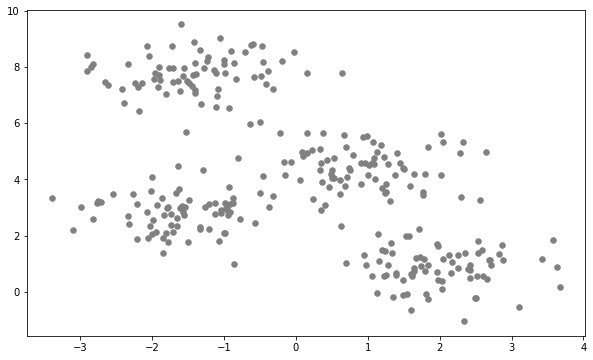

In [2]:
# visualize some data 
viz_kmeans.make_blob()

- Animation: https://stats-demos.zach.wiki/static/kmeans_clustering.mp4
    
- K-means visuals (Slideshow): https://docs.google.com/presentation/d/1NtMLd4fp2pi_bDJiIg2O-5g48xJiXjtYFad42B6Pj6Q/edit?usp=sharing

<hr style="border:2px solid black"> </hr>

In [3]:
from pydataset import data

# import data
iris = data('iris')

#take a look at the data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# rename columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

#make sure columns were renamed
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# define independent variables for k-means
X = iris[['sepal_length', 'petal_length']]

#take a look at X only
X.head()

,sepal_length,petal_length
1,5.1,1.4
2,4.9,1.4
3,4.7,1.3
4,4.6,1.5
5,5.0,1.4


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'petal_length'}>]], dtype=object)

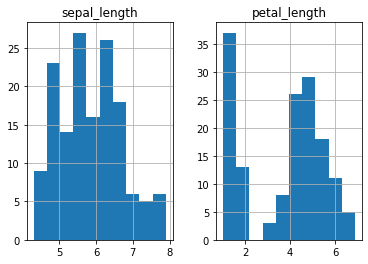

In [8]:
#take a look at distribution to decide what scaler to use
#these are basically normal
X.hist()

In [6]:
# Scale the X
from sklearn.preprocessing import StandardScaler

#fit on X
scaler = StandardScaler().fit(X)

#transform on X
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
#take a look at X_scaled
X_scaled.head()

,sepal_length,petal_length
1,-0.900681,-1.340227
2,-1.143017,-1.340227
3,-1.385353,-1.397064
4,-1.506521,-1.283389
5,-1.021849,-1.340227


In [9]:
# sklearn implementation of KMeans

#define the thing/ choosing 3 clusters
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing on X_scaled
kmeans.fit(X_scaled)

# Use (predict using) the thing
#which clusters correspond to each datapoint
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2], dtype=int32)

In [10]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] =kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [11]:
# lets look at sample of 15 randomly selected rows in iris dataset
iris.sample(15)
#this shows you in 'cluster' column which cluster the computer believes it belongs to

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
91,5.5,2.6,4.4,1.2,versicolor,2
4,4.6,3.1,1.5,0.2,setosa,0
126,7.2,3.2,6.0,1.8,virginica,1
144,6.8,3.2,5.9,2.3,virginica,1
125,6.7,3.3,5.7,2.1,virginica,1
106,7.6,3.0,6.6,2.1,virginica,1
22,5.1,3.7,1.5,0.4,setosa,0
82,5.5,2.4,3.7,1.0,versicolor,2
19,5.7,3.8,1.7,0.3,setosa,0
25,4.8,3.4,1.9,0.2,setosa,0


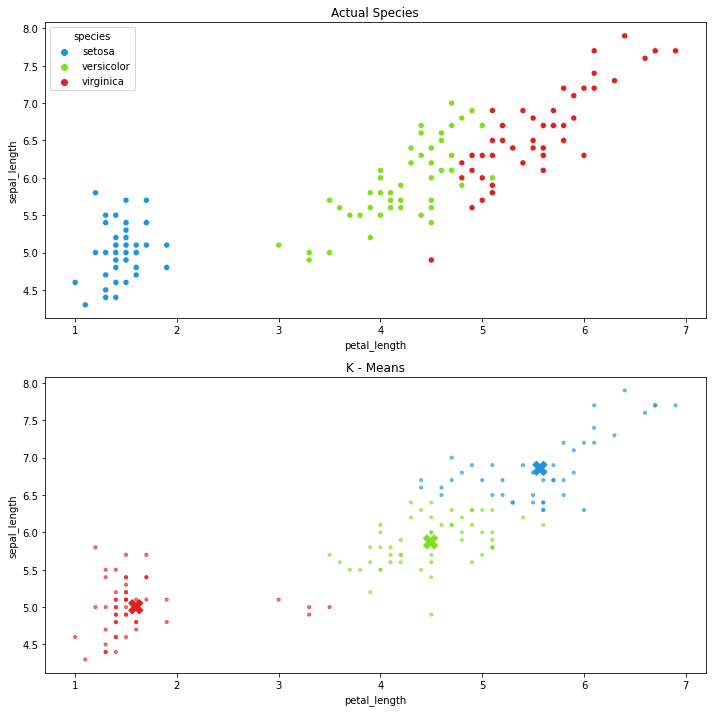

In [12]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

### Attributes for Kmeans :
- clustercenters: The center point of each cluster (aka centroids).
- labels_: The labels for each observation.
- intertia_: Sum of squared distances of samples to their closest cluster center.

In [13]:
#Cluster Centers aka centroids. 
#The output is scaled!! Not original units
kmeans.cluster_centers_

array([[-1.01511749, -1.22865676],
       [ 1.22961906,  1.02844019],
       [ 0.03665519,  0.41744409]])

In [14]:
# Make a dataframe of scaled centroids
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids_scaled

,sepal_length,petal_length
0,-1.015117,-1.228657
1,1.229619,1.028440
2,0.036655,0.417444


In [16]:
# DataFrame of unscaled Centriods
#group by clusters. mean of sepal and petal length.
centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

#this will correspond with scatterplot- unscaled data

,sepal_length,petal_length
cluster,,
0,5.005556,1.596296
1,6.858140,5.567442
2,5.873585,4.492453


In [17]:
# Another way to get unscaled centroids?
scaler.inverse_transform(kmeans.cluster_centers_)

#gives same values as above. just another way to reverse scaled data back to unscaled

array([[5.00555556, 1.5962963 ],
       [6.85813953, 5.56744186],
       [5.87358491, 4.49245283]])

In [18]:
# Labels (same as from predict)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2], dtype=int32)

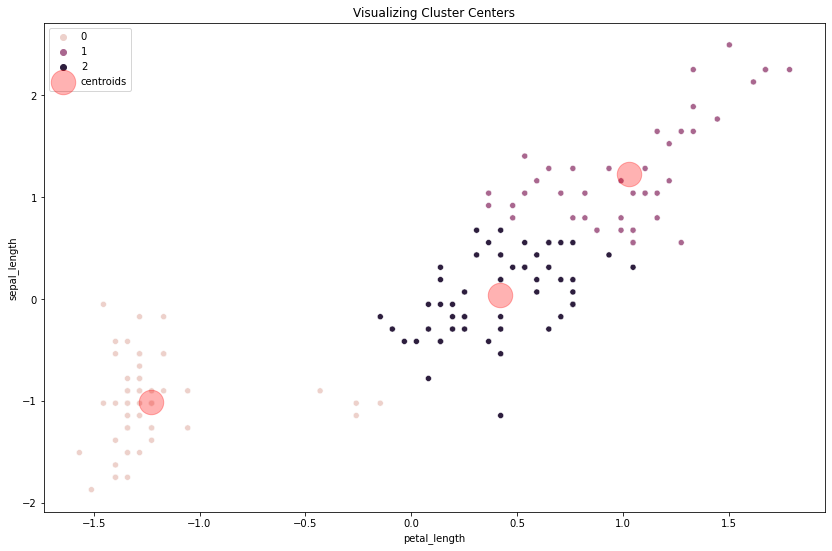

In [25]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_length', y='sepal_length', data=X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
#scaled data
centroids_scaled.plot.scatter(x='petal_length', y='sepal_length', ax=plt.gca(), s=600, color='red', alpha = 0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [28]:
#change the cluster column to a string to plot it better
iris['cluster'] = 'cluster_' +iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


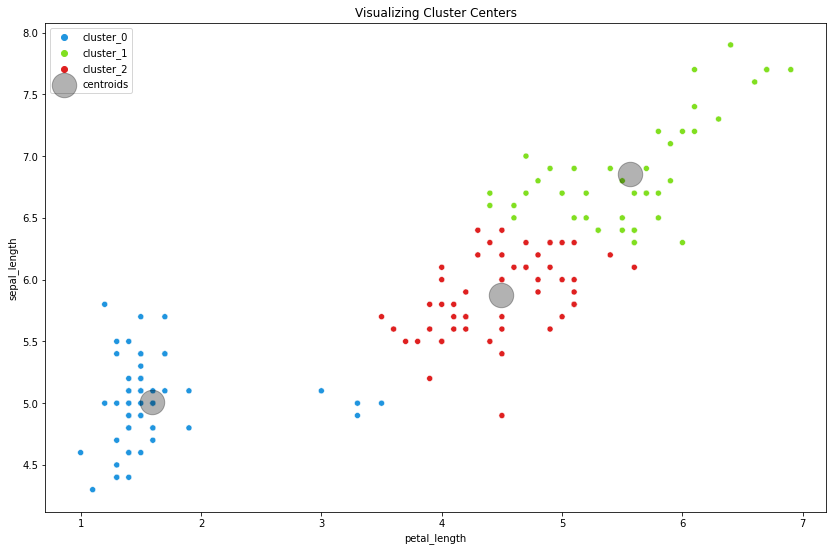

In [31]:
# lets visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_length', y='sepal_length', data=iris, hue = 'cluster')

# plot cluster centers (centroids)
#unscaled data
centroids.plot.scatter(x='petal_length', y='sepal_length', ax=plt.gca(), s=600, color='k', alpha = 0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

<hr style="border:2px solid black"> </hr>

### Redo everything but with Cluster of 2

In [32]:
#identify X
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler

#fit the data
scaler = StandardScaler().fit(X)

#transfor the data
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

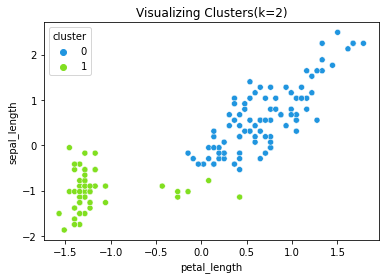

In [44]:
# lets look at two clusters (i.e k = 2)
#create
kmeans = KMeans(n_clusters = 2)
#fit
kmeans.fit(X_scaled)
#predict
X_scaled['cluster'] = kmeans.predict(X_scaled)
#plot
sns.scatterplot(x='petal_length', y='sepal_length', data = X_scaled, hue = 'cluster')
plt.title('Visualizing Clusters(k=2)')
plt.show()

<hr style="border:2px solid black"> </hr>

# How to choose 'k'
- prior knowledge of the application (AKA domain knowledge)
    - ex: there are 5 different types of bacteria n the world (k=5)
    - ex: there are two kinds of people in the world (k=2)

## Search for a good 'k'
##### WITHOUT domain knowledge....
<br>

- try different k values and evaluate resulets
    - **interia** = sum of squared distances from each point to its assigned centroid
    - minimize **inertia** 
    - use **elbow method**
        - try different k values and look at inertia for each k
        - when inertia flattens out... thats the appropriate k

## Use Hierarchial Clustering
- try on a subset of data and guess k
- not great on large datasets, can use on sample of large datasets

<hr style="border:2px solid black"> </hr>

## Lets try it out!
- inertia method!

In [34]:
#identify X
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler

#fit the model
scaler = StandardScaler().fit(X)

#transform the model
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

84.72073862193372

In [37]:
#with k of 2 the inertia is 84
k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

84.72073862193372

In [38]:
#with k of 3 the inertia is 43
#very large drop off, nearly half
k =3 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

43.034691996034674

In [39]:
#with k of 4 the inertia is 28
#still a large drop off but not AS much
k =4 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

28.486372225447568

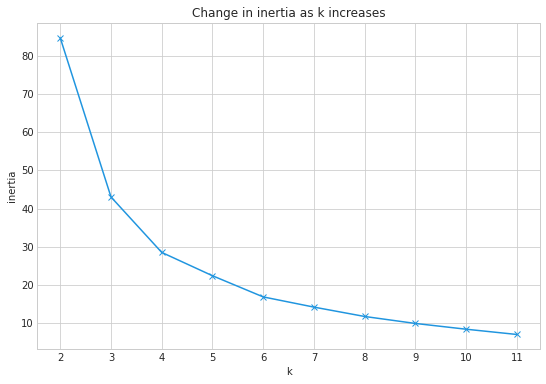

In [40]:
# lets plot inertia vs k
#lot inertia with k from 2-11
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
#this is subjective.
#when the drop off stops (around 4) we would chose that K

<hr style="border:2px solid black"> </hr>

### Another way of choosing k is to plot it with subplot and visualize which clusters looks best

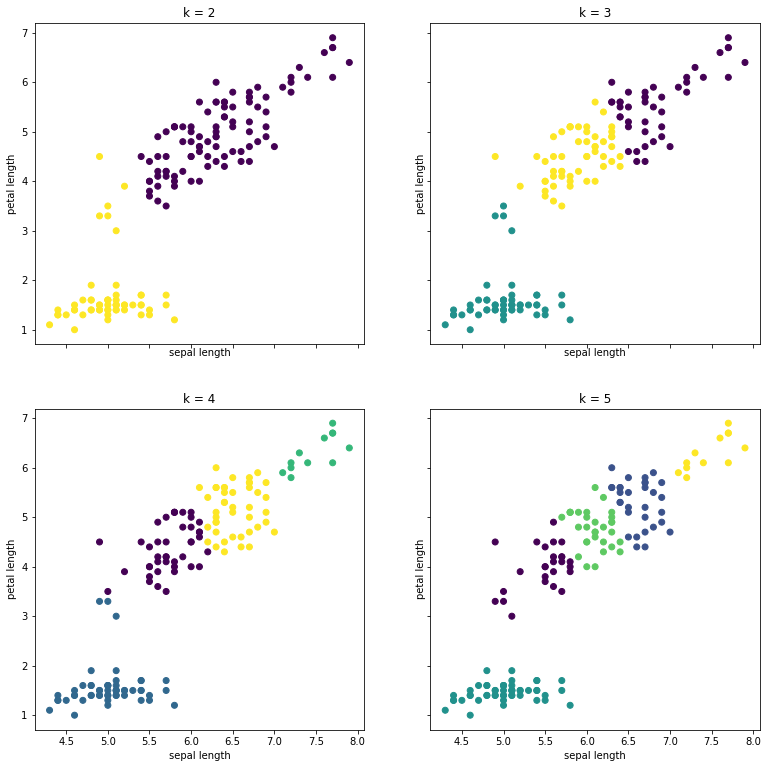

In [41]:
# What value of k is appropriate?
#plot it
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

#k =2-5.. take a look at those different k values
for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')